### Goal_score and G*

In [1]:
GENERATIVE_IDS = [1, 8, 10, 12, 24, 30, 35, 44, 46, 50, 53, 56, 57, 60, 61, 63, 65, 67, 69, 70, 75, 78, 92, 93, 94, 97, 98, 101, 103, 106, 107, 113, 115, 117, 119, 121, 122, 125, 129, 132, 134, 135, 139, 146, 147, 148, 159, 162, 164, 166, 168, 170, 174, 185, 196, 198, 215, 217, 221, 223, 231, 232, 233, 234, 235, 244, 245, 246, 261, 274, 277, 278, 284, 293, 294, 303, 304, 311, 319, 332, 335, 336, 338, 339, 341, 351, 358, 359, 362, 363, 364, 365, 368, 371, 374, 382, 389, 394, 399, 407, 408, 412, 413, 414, 418, 419, 424, 425, 430, 436, 442, 443, 445, 447, 448, 450, 451, 463, 467, 468, 472, 473, 476, 481, 483, 484, 485, 487, 491, 495, 497, 500, 508, 509, 515, 516, 521, 526, 530, 533, 539, 546, 551, 552, 553, 556, 560, 563, 567, 571, 572, 582, 584, 586, 588, 595, 596, 600, 604, 605, 614, 615, 620, 623, 624, 640, 643, 644, 645, 646, 647, 650, 651, 652, 655, 660, 664, 677, 679, 683, 694, 697, 698, 701, 704, 706, 712, 714, 716, 728, 731, 739, 741, 742, 749, 752, 755, 756, 758, 759, 761, 764, 766, 768, 775, 776, 777, 788, 789, 796, 798, 799, 800, 805, 806, 816, 817, 818, 819, 820, 822, 826]

In [2]:
import pandas as pd
def goal_score_g(FILE_IN, FILE_OUT):
    # === ✅ Load CSV ===
    df = pd.read_csv(FILE_IN)

    # === ✅ Clear goal_accuray for generative rows ===
    for idx in GENERATIVE_IDS:
        if 0 <= idx < len(df):
            df.at[idx, "goal_accuray"] = ""

    # === ✅ Save updated version ===
    df.to_csv(FILE_OUT, index=False)
    print(f"✅ Cleared 'goal_accuray' for {len(GENERATIVE_IDS)} rows → saved to: {FILE_OUT}")

    # === ✅ Re-load updated file for metric computation ===
    df_updated = pd.read_csv(FILE_OUT)

    # === ✅ Compute global average of goal_accuray ===
    df_updated['goal_accuray'] = pd.to_numeric(df_updated['goal_accuray'], errors='coerce')
    global_avg = df_updated['goal_accuray'].dropna().mean()
    print(f"\n📊 Global average goal_accuray (excluding cleared): {global_avg:.3f}")

    # === ✅ Compute generative subset means (tool metrics only) ===
    columns = ['precision_score', 'tool_accuray', 'toolset_accuray']
    for col in columns:
        df_updated[col] = pd.to_numeric(df_updated[col], errors='coerce')

    # subset_means = {col: df_updated.loc[GENERATIVE_IDS, col].dropna().mean() for col in columns}
    valid_ids = [i for i in GENERATIVE_IDS if i in df_updated.index]
    subset_means = {col: df_updated.loc[valid_ids, col].dropna().mean() for col in columns}

    print("\n📊 Means over generative rows:")
    for col, val in subset_means.items():
        print(f"• {col}: {val:.3f}")

    overall_tool_avg = sum(subset_means.values()) / len(subset_means)
    print(f"\n✅ Average of tool metrics for generative rows: {overall_tool_avg:.3f}")

## Qwen Judge

In [9]:
goal_score_g("/home/amal.saqib/Downloads/Agentic_Reasoning/qwen_evalaution/gemini_evaluation_results_with_qwen_judge.csv", "/home/amal.saqib/Downloads/Agentic_Reasoning/qwen_evalaution/gemini_evaluation_results_with_qwen_judge_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: /home/amal.saqib/Downloads/Agentic_Reasoning/qwen_evalaution/gemini_evaluation_results_with_qwen_judge_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.052

📊 Means over generative rows:
• precision_score: 0.563
• tool_accuray: 0.890
• toolset_accuray: 0.842

✅ Average of tool metrics for generative rows: 0.765


In [10]:
goal_score_g("./qwen_evalaution/gemini25_evaluation_results_with_qwen_judge.csv", "./qwen_evalaution/gemini25_evaluation_results_with_qwen_judge_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: ./qwen_evalaution/gemini25_evaluation_results_with_qwen_judge_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.500

📊 Means over generative rows:
• precision_score: 0.536
• tool_accuray: 0.872
• toolset_accuray: 0.814

✅ Average of tool metrics for generative rows: 0.741


In [11]:
goal_score_g("./qwen_evalaution/gemma_evaluation_results_with_qwen_judge.csv", "./qwen_evalaution/gemma_evaluation_results_with_qwen_judge_g_star.csv")
goal_score_g("./qwen_evalaution/gpt4o_evaluation_results_with_qwen_judge.csv", "./qwen_evalaution/gpt4o_evaluation_results_with_qwen_judge_g_star.csv")
goal_score_g("./qwen_evalaution/internvl_evaluation_results_with_qwen_judge.csv", "./qwen_evalaution/internvl_evaluation_results_with_qwen_judge_g_star.csv")
goal_score_g("./qwen_evalaution/internvl25_evaluation_results_with_qwen_judge.csv", "./qwen_evalaution/internvl25_evaluation_results_with_qwen_judge_g_star.csv")
goal_score_g("./qwen_evalaution/o4_mini_evaluation_results_with_qwen_judge.csv", "./qwen_evalaution/o4_mini_evaluation_results_with_qwen_judge_g_star.csv")
goal_score_g("./qwen_evalaution/phi4_evaluation_results_with_qwen_judge.csv", "./qwen_evalaution/phi4_evaluation_results_with_qwen_judge_g_star.csv")
goal_score_g("./qwen_evalaution/qwen_evaluation_results_with_qwen_judge.csv", "./qwen_evalaution/qwen_evaluation_results_with_qwen_judge_g_star.csv")
goal_score_g("./qwen_evalaution/vllama3_evaluation_results_with_qwen_judge.csv", "./qwen_evalaution/vllama3_evaluation_results_with_qwen_judge_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: ./qwen_evalaution/gemma_evaluation_results_with_qwen_judge_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.297

📊 Means over generative rows:
• precision_score: 0.455
• tool_accuray: 0.734
• toolset_accuray: 0.848

✅ Average of tool metrics for generative rows: 0.679
✅ Cleared 'goal_accuray' for 222 rows → saved to: ./qwen_evalaution/gpt4o_evaluation_results_with_qwen_judge_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.438

📊 Means over generative rows:
• precision_score: 0.302
• tool_accuray: 0.585
• toolset_accuray: 0.559

✅ Average of tool metrics for generative rows: 0.482
✅ Cleared 'goal_accuray' for 222 rows → saved to: ./qwen_evalaution/internvl_evaluation_results_with_qwen_judge_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.227

📊 Means over generative rows:
• precision_score: 0.294
• tool_accuray: 0.579
• toolset_accuray: 0.660

✅ Average of tool metrics for generative rows

In [16]:
goal_score_g("./qwen_evalaution/kimivl_evaluation_results_with_qwen.csv", "./qwen_evalaution/kimivl_evaluation_results_with_qwen_g_star.csv")
goal_score_g("./qwen_evalaution/llama32_evaluation_results_with_qwen.csv", "./qwen_evalaution/llama32_evaluation_results_with_qwen_g_star.csv")
goal_score_g("./qwen_evalaution/mplugowl_evaluation_results_with_qwen.csv", "./qwen_evalaution/mplugowl_evaluation_results_with_qwen_g_star.csv")
goal_score_g("./qwen_evalaution/pixtral_evaluation_results_with_qwen.csv", "./qwen_evalaution/pixtral_evaluation_results_with_qwen_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: ./qwen_evalaution/kimivl_evaluation_results_with_qwen_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.349

📊 Means over generative rows:
• precision_score: 0.344
• tool_accuray: 0.688
• toolset_accuray: 0.764

✅ Average of tool metrics for generative rows: 0.599
✅ Cleared 'goal_accuray' for 222 rows → saved to: ./qwen_evalaution/llama32_evaluation_results_with_qwen_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.101

📊 Means over generative rows:
• precision_score: 0.056
• tool_accuray: 0.107
• toolset_accuray: 0.163

✅ Average of tool metrics for generative rows: 0.109
✅ Cleared 'goal_accuray' for 222 rows → saved to: ./qwen_evalaution/mplugowl_evaluation_results_with_qwen_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.163

📊 Means over generative rows:
• precision_score: 0.229
• tool_accuray: 0.419
• toolset_accuray: 0.690

✅ Average of tool metrics for generative rows: 0.446
✅ Clear

## GPT judge

In [14]:
goal_score_g("./gpt_evaluation/kimivl_evaluation_results.csv", "./gpt_evaluation/kimivl_evaluation_results_g_star.csv")
goal_score_g("./gpt_evaluation/llama32_evaluation_results.csv", "./gpt_evaluation/llama32_evaluation_results_g_star.csv")
goal_score_g("./gpt_evaluation/mplugowl_evaluation_results.csv", "./gpt_evaluation/mplugowl_evaluation_results_g_star.csv")
goal_score_g("./gpt_evaluation/pixtral_evaluation_results.csv", "./gpt_evaluation/pixtral_evaluation_results_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: ./gpt_evaluation/kimivl_evaluation_results_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.286

📊 Means over generative rows:
• precision_score: 0.273
• tool_accuray: 0.593
• toolset_accuray: 0.000

✅ Average of tool metrics for generative rows: 0.289
✅ Cleared 'goal_accuray' for 222 rows → saved to: ./gpt_evaluation/llama32_evaluation_results_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.065

📊 Means over generative rows:
• precision_score: 0.171
• tool_accuray: 0.235
• toolset_accuray: 0.387

✅ Average of tool metrics for generative rows: 0.264
✅ Cleared 'goal_accuray' for 222 rows → saved to: ./gpt_evaluation/mplugowl_evaluation_results_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.113

📊 Means over generative rows:
• precision_score: 0.156
• tool_accuray: 0.209
• toolset_accuray: 0.413

✅ Average of tool metrics for generative rows: 0.259
✅ Cleared 'goal_accuray' for 222 rows → 

In [13]:
goal_score_g("evaluation_metric_scores_gpt4o.csv", "gpt4o_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: gpt4o_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.370

📊 Means over generative rows:
• precision_score: 0.591
• tool_accuray: 0.765
• toolset_accuray: 0.731

✅ Average of tool metrics for generative rows: 0.696


/tmp/ipykernel_852127/2113708128.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "goal_accuray"] = ""


In [14]:
goal_score_g("internvl2_5_evaluation_results.csv", "internvl2_5_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: internvl2_5_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.281

📊 Means over generative rows:
• precision_score: 0.455
• tool_accuray: 0.519
• toolset_accuray: 0.684

✅ Average of tool metrics for generative rows: 0.553


/tmp/ipykernel_852127/2113708128.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "goal_accuray"] = ""


In [15]:
goal_score_g("internvl3_evaluation_results.csv", "internvl3_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: internvl3_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.202

📊 Means over generative rows:
• precision_score: 0.477
• tool_accuray: 0.577
• toolset_accuray: 0.714

✅ Average of tool metrics for generative rows: 0.589


/tmp/ipykernel_852127/2113708128.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "goal_accuray"] = ""


In [26]:
goal_score_g("evaluation_metric_scores.csv", "videollama_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: videollama_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.280

📊 Means over generative rows:
• precision_score: 0.451
• tool_accuray: 0.501
• toolset_accuray: 0.671

✅ Average of tool metrics for generative rows: 0.541


/tmp/ipykernel_852127/2113708128.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "goal_accuray"] = ""


In [28]:
goal_score_g("qwen2_5_evaluation_results.csv", "qwen2_5_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: qwen2_5_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.358

📊 Means over generative rows:
• precision_score: 0.567
• tool_accuray: 0.637
• toolset_accuray: 0.745

✅ Average of tool metrics for generative rows: 0.650


/tmp/ipykernel_852127/2113708128.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "goal_accuray"] = ""


In [32]:
goal_score_g("gemini_evaluation_results.csv", "gemini_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: gemini_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.043

📊 Means over generative rows:
• precision_score: 0.413
• tool_accuray: 0.773
• toolset_accuray: 0.500

✅ Average of tool metrics for generative rows: 0.562


/tmp/ipykernel_852127/2113708128.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "goal_accuray"] = ""


In [130]:
goal_score_g("o4_mini_evaluation_results.csv", "o4_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: o4_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.453

📊 Means over generative rows:
• precision_score: 0.395
• tool_accuray: 0.937
• toolset_accuray: 0.670

✅ Average of tool metrics for generative rows: 0.667


/tmp/ipykernel_852127/753101074.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "goal_accuray"] = ""


In [20]:
goal_score_g("gemini25_evaluation_results.csv", "gemini25_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: gemini25_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.403

📊 Means over generative rows:
• precision_score: 0.422
• tool_accuray: 0.735
• toolset_accuray: 0.523

✅ Average of tool metrics for generative rows: 0.560


/tmp/ipykernel_2644830/4157166913.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "goal_accuray"] = ""


In [21]:
goal_score_g("gemma_evaluation_results.csv", "gemma_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: gemma_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.269

📊 Means over generative rows:
• precision_score: 0.571
• tool_accuray: 0.781
• toolset_accuray: 0.670

✅ Average of tool metrics for generative rows: 0.674


/tmp/ipykernel_2644830/4157166913.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "goal_accuray"] = ""


In [31]:
goal_score_g("phi4_evaluation_results.csv", "phi_g_star.csv")

✅ Cleared 'goal_accuray' for 222 rows → saved to: phi_g_star.csv

📊 Global average goal_accuray (excluding cleared): 0.110

📊 Means over generative rows:
• precision_score: 0.364
• tool_accuray: 0.188
• toolset_accuray: 0.238

✅ Average of tool metrics for generative rows: 0.263


/tmp/ipykernel_2644830/4157166913.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "goal_accuray"] = ""


### Tool calls pass and failed

In [22]:
def analyze_tool_call_statistics(json_path):
    import json

    with open(json_path, 'r') as f:
        data = json.load(f)

    # ✅ Replace with your actual 14 tools
    allowed_tools = {
        "Calculator", "OCR", "ObjectCounter", "SceneDescriber",
        "WebSearch", "RegionDescriber", "LocateObjectByText",
        "CodePlotter", "MathOCR", "Solver", "DrawBoundingBox",
        "OverlayText", "ImageGenerator", "ImageStylization"
    }

    total_samples = len(data)
    total_reasoning_steps = 0
    empty_reasoning_samples = 0

    successful_calls = 0
    failed_steps = 0
    failed_empty_steps = 0
    failed_tool_no_output = 0
    failed_output_no_tool = 0
    invalid_tool_calls = 0

    for sample_wrapper in data:
        if not isinstance(sample_wrapper, dict):
            continue
        sample = list(sample_wrapper.values())[0]
        steps = sample.get("reasoning_steps", [])

        if not isinstance(steps, list) or len(steps) == 0:
            empty_reasoning_samples += 1
            continue

        for step in steps:
            total_reasoning_steps += 1
            tool = step.get("tool") or step.get("tool_used")
            output = step.get("output") or step.get("tool_output")
            thought = step.get("thought", "")

            tool_is_empty = tool in [None, "", "null"]
            output_is_empty = output in [None, "", "null", 0]
            thought_is_empty = thought.strip() == ""

            # ❌ Invalid tool call (not in your allowed list)
            if tool and isinstance(tool, str) and tool not in allowed_tools:
                invalid_tool_calls += 1

            if not tool_is_empty and not output_is_empty:
                successful_calls += 1
            else:
                failed_steps += 1
                if tool_is_empty and output_is_empty and thought_is_empty:
                    failed_empty_steps += 1
                elif not tool_is_empty and output_is_empty:
                    failed_tool_no_output += 1
                elif tool_is_empty and not output_is_empty:
                    failed_output_no_tool += 1

    # ✅ Total failure cases
    total_failed_all = empty_reasoning_samples + failed_steps + invalid_tool_calls

    print("========= Tool Call Analysis =========")
    print(f"Total samples: {total_samples}")
    print(f"Total reasoning steps: {total_reasoning_steps}")
    print(f"Samples with empty or missing reasoning steps: {empty_reasoning_samples}")
    print(f"Successful tool calls: {successful_calls}")
    print(f"Failed steps (total): {failed_steps}")
    print(f"  ↳ Tool used but no output: {failed_tool_no_output}")
    print(f"  ↳ Output present but no tool used: {failed_output_no_tool}")
    print(f"  ↳ Empty step (no tool, no output, no thought): {failed_empty_steps}")
    print(f"❌ Invalid tool calls (not in allowed tool list): {invalid_tool_calls}")
    print(f"\n🚨 Total failures (empty + failed + invalid): {total_failed_all}")
    print("======================================")

In [18]:
analyze_tool_call_statistics("internvl2_5_results_final.json")

========= Tool Call Analysis =========
Total samples: 828
Total reasoning steps: 2323
Samples with empty or missing reasoning steps: 42
Successful tool calls: 2222
Failed steps (total): 101
  ↳ Tool used but no output: 58
  ↳ Output present but no tool used: 27
  ↳ Empty step (no tool, no output, no thought): 5
❌ Invalid tool calls (not in allowed tool list): 341

🚨 Total failures (empty + failed + invalid): 484


In [20]:
analyze_tool_call_statistics("gpt4o_results_final.json")

========= Tool Call Analysis =========
Total samples: 827
Total reasoning steps: 1594
Samples with empty or missing reasoning steps: 156
Successful tool calls: 1581
Failed steps (total): 13
  ↳ Tool used but no output: 2
  ↳ Output present but no tool used: 4
  ↳ Empty step (no tool, no output, no thought): 0
❌ Invalid tool calls (not in allowed tool list): 166

🚨 Total failures (empty + failed + invalid): 335


In [21]:
analyze_tool_call_statistics("videollama3_results_final 2.json")

========= Tool Call Analysis =========
Total samples: 828
Total reasoning steps: 1971
Samples with empty or missing reasoning steps: 104
Successful tool calls: 1966
Failed steps (total): 5
  ↳ Tool used but no output: 0
  ↳ Output present but no tool used: 3
  ↳ Empty step (no tool, no output, no thought): 2
❌ Invalid tool calls (not in allowed tool list): 323

🚨 Total failures (empty + failed + invalid): 432


In [22]:
analyze_tool_call_statistics("internvl3_results_final.json")

========= Tool Call Analysis =========
Total samples: 828
Total reasoning steps: 1854
Samples with empty or missing reasoning steps: 172
Successful tool calls: 1791
Failed steps (total): 63
  ↳ Tool used but no output: 3
  ↳ Output present but no tool used: 20
  ↳ Empty step (no tool, no output, no thought): 21
❌ Invalid tool calls (not in allowed tool list): 195

🚨 Total failures (empty + failed + invalid): 430


In [30]:
analyze_tool_call_statistics("qwen2_5_results_final.json")

========= Tool Call Analysis =========
Total samples: 828
Total reasoning steps: 2136
Samples with empty or missing reasoning steps: 25
Successful tool calls: 2132
Failed steps (total): 4
  ↳ Tool used but no output: 2
  ↳ Output present but no tool used: 1
  ↳ Empty step (no tool, no output, no thought): 0
❌ Invalid tool calls (not in allowed tool list): 80

🚨 Total failures (empty + failed + invalid): 109


In [33]:
analyze_tool_call_statistics("gemini_results_final.json")

========= Tool Call Analysis =========
Total samples: 828
Total reasoning steps: 2193
Samples with empty or missing reasoning steps: 5
Successful tool calls: 2163
Failed steps (total): 30
  ↳ Tool used but no output: 15
  ↳ Output present but no tool used: 1
  ↳ Empty step (no tool, no output, no thought): 0
❌ Invalid tool calls (not in allowed tool list): 194

🚨 Total failures (empty + failed + invalid): 229


In [131]:
analyze_tool_call_statistics("o4_mini_results_final.json")

========= Tool Call Analysis =========
Total samples: 825
Total reasoning steps: 2376
Samples with empty or missing reasoning steps: 19
Successful tool calls: 2336
Failed steps (total): 40
  ↳ Tool used but no output: 37
  ↳ Output present but no tool used: 3
  ↳ Empty step (no tool, no output, no thought): 0
❌ Invalid tool calls (not in allowed tool list): 979

🚨 Total failures (empty + failed + invalid): 1038


In [23]:
analyze_tool_call_statistics("gemini25_results_final.json")

========= Tool Call Analysis =========
Total samples: 828
Total reasoning steps: 2710
Samples with empty or missing reasoning steps: 52
Successful tool calls: 2515
Failed steps (total): 195
  ↳ Tool used but no output: 13
  ↳ Output present but no tool used: 27
  ↳ Empty step (no tool, no output, no thought): 0
❌ Invalid tool calls (not in allowed tool list): 252

🚨 Total failures (empty + failed + invalid): 499


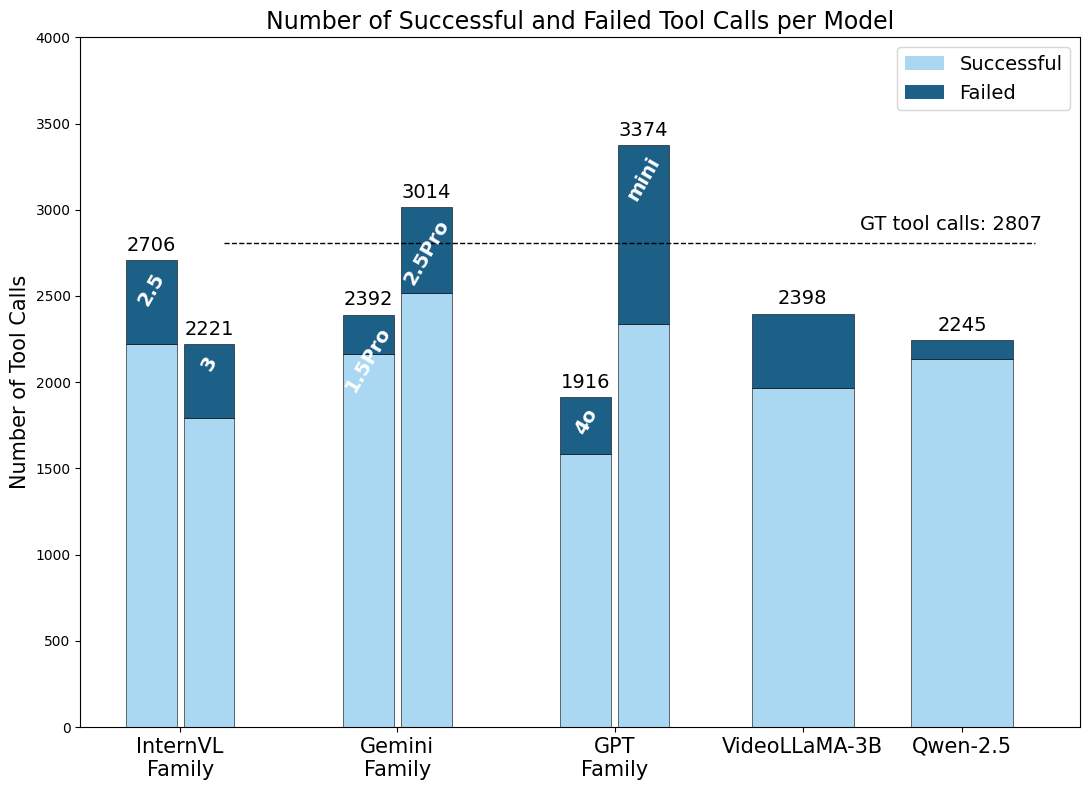

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# === Data ===
models = ['InternVL-2.5', 'InternVL-3', 
          'Gemini-1.5Pro', 'Gemini-2.5Pro', 
          'GPT-4o', 'GPT-o4-mini', 
          'VideoLLaMA-3', 'Qwen2_5']
successful = [2222, 1791, 2163, 2515, 1581, 2336, 1966, 2136]
failed =     [484, 430, 229, 499, 335, 1038, 432, 109]
gt_tool_calls = 2807

# === Bar width settings ===
bar_width_main = 0.7
bar_width_sub = 0.35

# === New Custom group positions
x_positions = {
    'InternVL-2.5':   0.7,
    'InternVL-3':     1.1,
    'Gemini-1.5Pro':  2.2,
    'Gemini-2.5Pro':  2.6,
    'GPT-4o':         3.7,
    'GPT-o4-mini':    4.1,
    'VideoLLaMA-3':   5.2,
    'Qwen2_5':        6.3
}

# === Plot Setup ===
fig, ax = plt.subplots(figsize=(11, 8))

# === Plot Bars ===
for i, name in enumerate(models):
    x_pos = x_positions[name]
    width = bar_width_sub if any(k in name for k in ['InternVL', 'GPT', 'Gemini']) else bar_width_main
    ax.bar(x_pos, successful[i], width, color='#aad7f1', edgecolor='black', linewidth=0.4)
    ax.bar(x_pos, failed[i], width, bottom=successful[i], color='#1c6087', edgecolor='black', linewidth=0.4)
    total = successful[i] + failed[i]
    ax.text(x_pos, total + 30, str(total), ha='center', va='bottom', fontsize=14)

    if width == bar_width_sub:
        label = name.split('-')[-1].replace('_', '')
        ax.text(
            x_pos, total - 50, label,
            ha='center', va='top',
            fontsize=14, color='white', fontweight='bold',
            rotation=60
        )

# === GT Reference Line
ax.hlines(y=gt_tool_calls, xmin=1.2, xmax=6.8, color='black', linestyle='--', linewidth=1)
ax.text(6.85, gt_tool_calls + 50, f'GT tool calls: {gt_tool_calls}', ha='right', va='bottom', fontsize=14)

# === X-axis ticks and labels (aligned to group centers)
x_ticks = [0.9, 2.4, 3.9, 5.2, 6.3]
x_labels = ['InternVL\nFamily', 'Gemini\nFamily', 'GPT\nFamily', 'VideoLLaMA-3B', 'Qwen-2.5']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=0, fontsize=15)

# === Labels and Legend
ax.set_ylabel('Number of Tool Calls', fontsize=15)
ax.set_title('Number of Successful and Failed Tool Calls per Model', fontsize=17)
ax.set_ylim([0, 4000])

legend_handles = [
    Patch(facecolor='#aad7f1', label='Successful'),
    Patch(facecolor='#1c6087', label='Failed')
]
ax.legend(handles=legend_handles, loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()


In [33]:
import json
import pandas as pd

# Load JSON file
with open("o4_mini_results_final.json", "r") as f:
    data = json.load(f)

# Initialize a list to store the summary
summary_data = []

# Iterate through each datapoint
for item in data:
    for key, entry in item.items():
        # Skip if 'reasoning_steps' is missing
        if "reasoning_steps" not in entry:
            continue

        steps = entry["reasoning_steps"]
        total_steps = len(steps)
        
        tools_used = [step.get("tool_used") for step in steps if step.get("tool_used") and step.get("tool_used") != "None"]
        unique_tools = set(tools_used)

        summary_data.append({
            "id": int(key),
            "filename": entry.get("filename", ""),
            "total_steps": total_steps,
            "unique_tools_used": len(unique_tools),
            "all_tools_used": tools_used
        })

# Convert to DataFrame
df_summary = pd.DataFrame(summary_data)

# Save or print the DataFrame
print(df_summary.head())
df_summary.to_csv("tool_usage_summary.csv", index=False)


   id     filename  total_steps  unique_tools_used  \
0   0  VCA_176.jpg            2                  2   
1   1  VCA_489.mp4            3                  3   
2   2  VCA_500.jpg            4                  1   
3   3  VCA_629.mp4            2                  2   
4   4  VCA_192.jpg            2                  1   

                                      all_tools_used  
0       [Manual inspection of endpoints, Calculator]  
1  [ObjectCounter, LocateObjectByText, DrawBoundi...  
2                                   [SceneDescriber]  
3                              [OCR, SceneDescriber]  
4                                   [SceneDescriber]  


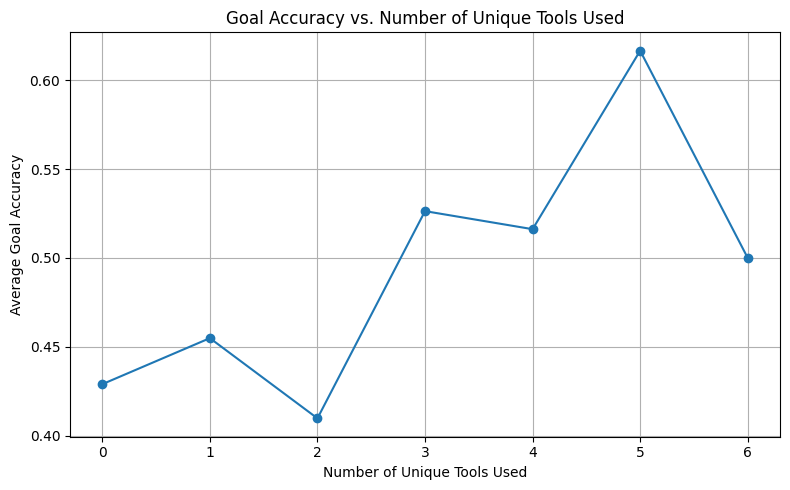

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both CSV files
df_tools = pd.read_csv("tool_usage_summary.csv")  # Has 'id' and 'filename'
df_metrics = pd.read_csv("o4_g_star.csv")         # No 'id', index is the id

# Add ID as a column from the index
df_metrics = df_metrics.reset_index().rename(columns={"index": "id"})

# Merge using 'id' now
df = pd.merge(df_tools, df_metrics, on="id")

# Drop rows with missing goal_accuracy
df = df.dropna(subset=["goal_accuray"])

# Group by unique tool usage count and compute mean goal accuracy
trend = df.groupby("unique_tools_used")["goal_accuray"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(trend["unique_tools_used"], trend["goal_accuray"], marker="o")
plt.title("Goal Accuracy vs. Number of Unique Tools Used")
plt.xlabel("Number of Unique Tools Used")
plt.ylabel("Average Goal Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


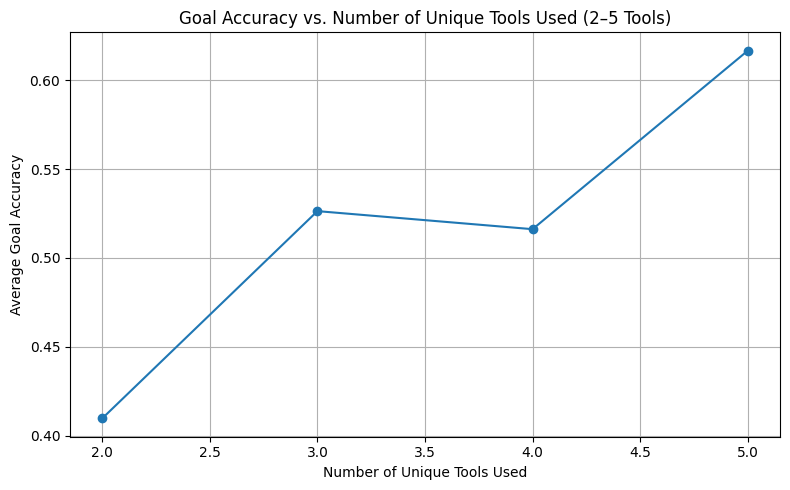

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both CSV files
df_tools = pd.read_csv("tool_usage_summary.csv")  # Has 'id' and 'filename'
df_metrics = pd.read_csv("o4_g_star.csv")         # No 'id', index is the id

# Add ID as a column from the index
df_metrics = df_metrics.reset_index().rename(columns={"index": "id"})

# Merge using 'id' now
df = pd.merge(df_tools, df_metrics, on="id")

# Drop rows with missing goal_accuracy
df = df.dropna(subset=["goal_accuray"])  # Ensure correct spelling

# Filter for unique tools used between 2 and 5
df_filtered = df[(df["unique_tools_used"] >= 2) & (df["unique_tools_used"] <= 5)]

# Group and calculate mean goal accuracy
trend = df_filtered.groupby("unique_tools_used")["goal_accuray"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(trend["unique_tools_used"], trend["goal_accuray"], marker="o")
plt.title("Goal Accuracy vs. Number of Unique Tools Used (2–5 Tools)")
plt.xlabel("Number of Unique Tools Used")
plt.ylabel("Average Goal Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_goal_accuracy_trends(tool_csv, metrics_csv, min_tools=2, max_tools=5, min_steps=1, max_steps=10):
    """
    Plots two trends:
    1. Goal Accuracy vs. Number of Unique Tools Used
    2. Goal Accuracy vs. Number of Reasoning Steps (Depth of Reasoning Chain)
    
    Parameters:
        tool_csv (str): Path to the CSV containing tool usage data ('id', 'unique_tools_used', 'total_steps').
        metrics_csv (str): Path to the CSV containing goal accuracy data (index is treated as 'id').
        min_tools (int): Minimum number of tools to include.
        max_tools (int): Maximum number of tools to include.
        min_steps (int): Minimum number of reasoning steps to include.
        max_steps (int): Maximum number of reasoning steps to include.
    """
    # Load files
    df_tools = pd.read_csv(tool_csv)
    df_metrics = pd.read_csv(metrics_csv).reset_index().rename(columns={"index": "id"})

    # Merge
    df = pd.merge(df_tools, df_metrics, on="id")

    # Drop missing goal accuracy rows
    df = df.dropna(subset=["goal_accuray"])

    # === Plot 1: Goal Accuracy vs. Unique Tools Used ===
    df_tools_filtered = df[(df["unique_tools_used"] >= min_tools) & (df["unique_tools_used"] <= max_tools)]
    trend_tools = df_tools_filtered.groupby("unique_tools_used")["goal_accuray"].mean().reset_index()

    plt.figure(figsize=(8, 5))
    plt.plot(trend_tools["unique_tools_used"], trend_tools["goal_accuray"], marker="o")
    plt.title(f"Goal Accuracy vs. Number of Unique Tools Used ({min_tools}–{max_tools} Tools)")
    plt.xlabel("Number of Unique Tools Used")
    plt.ylabel("Average Goal Accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Plot 2: Goal Accuracy vs. Reasoning Depth (Number of Steps) ===
    df_steps_filtered = df[(df["total_steps"] >= min_steps) & (df["total_steps"] <= max_steps)]
    trend_steps = df_steps_filtered.groupby("total_steps")["goal_accuray"].mean().reset_index()

    plt.figure(figsize=(8, 5))
    plt.plot(trend_steps["total_steps"], trend_steps["goal_accuray"], marker="o", color='green')
    plt.title(f"Goal Accuracy vs. Reasoning Chain Depth ({min_steps}–{max_steps} Steps)")
    plt.xlabel("Number of Reasoning Steps")
    plt.ylabel("Average Goal Accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

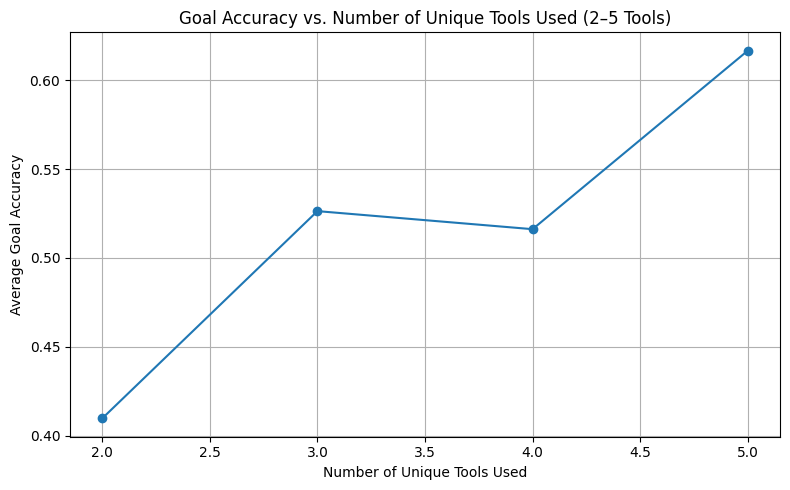

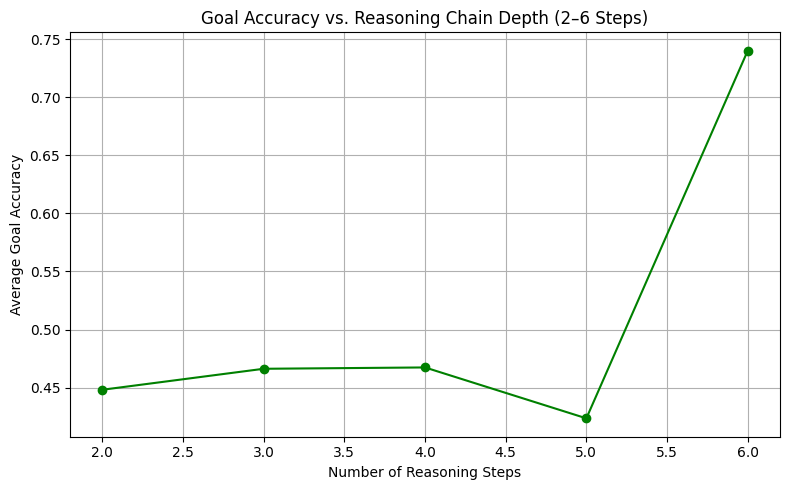

In [43]:
plot_goal_accuracy_trends("tool_usage_summary.csv", "o4_g_star.csv", min_tools=2, max_tools=5, min_steps=2, max_steps=6)

In [47]:
import json
import pandas as pd
import os

def extract_tool_usage_summary(json_path):
    """
    Extracts reasoning step summary (total steps, unique tools used) from a JSON file
    and saves it as a CSV with the same base name.

    Parameters:
        json_path (str): Path to the JSON file (e.g., 'model_results.json')

    Returns:
        pd.DataFrame: Summary DataFrame with tool and step counts
    """
    with open(json_path, "r") as f:
        data = json.load(f)

    summary_data = []

    for item in data:
        for key, entry in item.items():
            reasoning_steps = entry.get("reasoning_steps")

            # If reasoning_steps is missing or not a list, skip
            if not isinstance(reasoning_steps, list):
                continue

            total_steps = len(reasoning_steps)

            tools_used = []
            for step in reasoning_steps:
                tool = step.get("tool_used")
                if isinstance(tool, str) and tool != "None":
                    tools_used.append(tool)

            unique_tools = set(tools_used)

            summary_data.append({
                "id": int(key),
                "filename": entry.get("filename", ""),
                "total_steps": total_steps,
                "unique_tools_used": len(unique_tools),
                "all_tools_used": tools_used
            })

    df_summary = pd.DataFrame(summary_data)

    # Save using the JSON file name (with .csv extension)
    output_csv = os.path.splitext(json_path)[0] + ".csv"
    df_summary.to_csv(output_csv, index=False)
    print(f"✅ Saved summary to: {output_csv}")

    return df_summary


In [48]:
extract_tool_usage_summary("o4_mini_results_final.json")


✅ Saved summary to: o4_mini_results_final.csv


,id,filename,total_steps,unique_tools_used,all_tools_used
0,0,VCA_176.jpg,2,2,"[Manual inspection of endpoints, Calculator]"
1,1,VCA_489.mp4,3,3,"[ObjectCounter, LocateObjectByText, DrawBoundi..."
2,2,VCA_500.jpg,4,1,[SceneDescriber]
3,3,VCA_629.mp4,2,2,"[OCR, SceneDescriber]"
4,4,VCA_192.jpg,2,1,[SceneDescriber]
...,...,...,...,...,...
801,823,VCA_65.jpg,2,2,"[LocateObjectByText, DrawBoundingBox]"
802,824,VCA_13.jpg,3,2,"[ObjectCounter, OCR, OCR]"
803,825,VCA_567.jpg,4,4,[SceneDescriber – to confirm the overall shape...
804,826,VCA_795.jpg,3,3,"[SceneDescriber, ImageGenerator, OverlayText]"


In [ ]:
extract_tool_usage_summary("gemini25_results_final.json")

✅ Saved summary to: gemini25_results_final.csv


,id,filename,total_steps,unique_tools_used,all_tools_used
0,1,VCA_489.mp4,3,3,"[ObjectCounter, LocateObjectByText, DrawBoundi..."
1,2,VCA_500.jpg,4,3,"[SceneDescriber, OCR, WebSearch]"
2,3,VCA_629.mp4,3,3,"[OCR, ObjectCounter, SceneDescriber]"
3,4,VCA_192.jpg,5,2,"[SceneDescriber, OCR]"
4,5,VCA_612.avi,4,1,"[ObjectCounter, ObjectCounter, ObjectCounter]"
...,...,...,...,...,...
771,822,VCA_755.jpg,2,2,"[SceneDescriber, ImageStylization]"
772,823,VCA_65.jpg,2,2,"[LocateObjectByText, DrawBoundingBox]"
773,824,VCA_13.jpg,3,2,"[ObjectCounter, OCR, OCR]"
774,825,VCA_567.jpg,4,2,"[SceneDescriber, Calculator, Calculator]"


In [60]:
extract_tool_usage_summary("gemini_results_final.json")

✅ Saved summary to: gemini_results_final.csv


,id,filename,total_steps,unique_tools_used,all_tools_used
0,0,VCA_176.jpg,1,1,[OCR]
1,1,VCA_489.mp4,3,3,"[ObjectCounter, LocateObjectByText, DrawBoundi..."
2,2,VCA_500.jpg,1,1,[OCR and SceneDescriber]
3,3,VCA_629.mp4,2,2,"[OCR, ObjectCounter]"
4,4,VCA_192.jpg,2,1,[OCR]
...,...,...,...,...,...
820,823,VCA_65.jpg,5,4,"[ObjectCounter, LocateObjectByText, RegionDesc..."
821,824,VCA_13.jpg,3,2,"[ObjectCounter, OCR, OCR]"
822,825,VCA_567.jpg,3,1,[Calculator]
823,826,VCA_795.jpg,5,3,"[OCR, ImageGenerator, OverlayText]"


In [51]:
extract_tool_usage_summary("qwen2_5_results_final.json")

✅ Saved summary to: qwen2_5_results_final.csv


,id,filename,total_steps,unique_tools_used,all_tools_used
0,0,VCA_176.jpg,2,1,"[CodePlotter, CodePlotter]"
1,1,VCA_489.mp4,3,3,"[ObjectCounter, LocateObjectByText, DrawBoundi..."
2,2,VCA_500.jpg,4,3,"[SceneDescriber, ObjectCounter, WebSearch]"
3,3,VCA_629.mp4,2,2,"[SceneDescriber, ObjectCounter]"
4,5,VCA_612.avi,2,1,"[ObjectCounter, ObjectCounter]"
...,...,...,...,...,...
798,822,VCA_755.jpg,3,3,"[SceneDescriber, ImageGenerator, ImageStylizat..."
799,823,VCA_65.jpg,1,1,[LocateObjectByText]
800,824,VCA_13.jpg,3,3,"[ObjectCounter, OCR, SceneDescriber]"
801,826,VCA_795.jpg,2,2,"[ImageGenerator, OverlayText]"


In [53]:
extract_tool_usage_summary("videollama3_results_final 2.json")

✅ Saved summary to: videollama3_results_final 2.csv


,id,filename,total_steps,unique_tools_used,all_tools_used
0,0,VCA_176.jpg,2,2,"[MathOCR, Calculator]"
1,2,VCA_500.jpg,3,2,"[ObjectCounter, WebSearch, WebSearch]"
2,3,VCA_629.mp4,2,2,"[SceneDescriber, ObjectCounter]"
3,4,VCA_192.jpg,2,2,"[ObjectCounter, Calculator]"
4,5,VCA_612.avi,2,2,"[ObjectCounter, SceneDescriber]"
...,...,...,...,...,...
754,823,VCA_65.jpg,2,1,"[RegionDescriber, RegionDescriber]"
755,824,VCA_13.jpg,3,3,"[ObjectCounter, RegionDescriber, SceneDescriber]"
756,825,VCA_567.jpg,3,3,"[SceneDescriber, MathOCR, Calculator]"
757,826,VCA_795.jpg,2,2,"[Image Generator, Overlay Text Tool]"


In [62]:
extract_tool_usage_summary("gpt4o_results_final.json")

✅ Saved summary to: gpt4o_results_final.csv


,id,filename,total_steps,unique_tools_used,all_tools_used
0,0,VCA_176.jpg,2,2,"[Visual analysis of the line graph., Visual es..."
1,1,VCA_489.mp4,3,3,"[ObjectCounter, LocateObjectByText, DrawBoundi..."
2,2,VCA_500.jpg,3,3,"[SceneDescriber, None - Based on general knowl..."
3,3,VCA_629.mp4,3,0,[]
4,4,VCA_192.jpg,3,1,"[SceneDescriber, SceneDescriber, SceneDescriber]"
...,...,...,...,...,...
666,820,VCA_178.jpg,3,2,"[Visual Inspection, Calculator, Calculator]"
667,823,VCA_65.jpg,3,3,"[SceneDescriber, LocateObjectByText, DrawBound..."
668,824,VCA_13.jpg,3,3,"[ObjectCounter, OCR, SceneDescriber]"
669,826,VCA_795.jpg,2,2,"[ImageGenerator, OverlayText]"


In [63]:
extract_tool_usage_summary("internvl2_5_results_final.json")

✅ Saved summary to: internvl2_5_results_final.csv


,id,filename,total_steps,unique_tools_used,all_tools_used
0,0,VCA_176.jpg,3,0,[]
1,1,VCA_489.mp4,3,3,"[ObjectCounter, LocateObjectByText, RegionDesc..."
2,2,VCA_500.jpg,3,0,[]
3,3,VCA_629.mp4,2,0,[]
4,4,VCA_192.jpg,3,0,[]
...,...,...,...,...,...
781,823,VCA_65.jpg,2,0,[]
782,824,VCA_13.jpg,4,0,[]
783,825,VCA_567.jpg,3,0,[]
784,826,VCA_795.jpg,3,0,[]


In [64]:
extract_tool_usage_summary("internvl3_results_final.json")

✅ Saved summary to: internvl3_results_final.csv


,id,filename,total_steps,unique_tools_used,all_tools_used
0,0,VCA_176.jpg,2,2,"[CodePlotter, Calculator]"
1,1,VCA_489.mp4,3,3,"[ObjectCounter, LocateObjectByText, DrawBoundi..."
2,3,VCA_629.mp4,3,3,"[SceneDescriber, ObjectCounter, LocateObjectBy..."
3,5,VCA_612.avi,2,2,"[ObjectCounter, SceneDescriber]"
4,6,VCA_164.jpg,2,1,"[Calculator, Calculator]"
...,...,...,...,...,...
651,822,VCA_755.jpg,4,3,"[SceneDescriber, WebSearch, ImageStylization]"
652,823,VCA_65.jpg,2,2,"[LocateObjectByText, DrawBoundingBox]"
653,824,VCA_13.jpg,4,2,"[ObjectCounter, OCR, OCR]"
654,826,VCA_795.jpg,3,2,"[ImageGenerator, OverlayText]"


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_models_goal_accuracy_trends(
    model_info_list,
    min_tools=2,
    max_tools=5,
    min_steps=1,
    max_steps=10
):
    """
    Plots Goal Accuracy trends across multiple models on the same graphs.
    
    Parameters:
        model_info_list (list of tuples): Each tuple should be (label, tool_csv_path, metrics_csv_path)
        min_tools (int): Minimum number of unique tools to include
        max_tools (int): Maximum number of unique tools to include
        min_steps (int): Minimum number of reasoning steps to include
        max_steps (int): Maximum number of reasoning steps to include
    """
    
    # === Plot 1: Goal Accuracy vs Unique Tools Used ===
    plt.figure(figsize=(8, 5))
    for label, tool_csv, metrics_csv in model_info_list:
        df_tools = pd.read_csv(tool_csv)
        df_metrics = pd.read_csv(metrics_csv).reset_index().rename(columns={"index": "id"})
        df = pd.merge(df_tools, df_metrics, on="id")
        df = df.dropna(subset=["goal_accuray"])

        df_filtered = df[(df["unique_tools_used"] >= min_tools) & (df["unique_tools_used"] <= max_tools)]
        trend = df_filtered.groupby("unique_tools_used")["goal_accuray"].mean().reset_index()

        plt.plot(trend["unique_tools_used"], trend["goal_accuray"], marker="o", label=label)

    plt.title("Goal Accuracy vs. Number of Unique Tools Used")
    plt.xlabel("Number of Unique Tools Used")
    plt.ylabel("Average Goal Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Plot 2: Goal Accuracy vs Reasoning Chain Depth ===
    plt.figure(figsize=(8, 5))
    for label, tool_csv, metrics_csv in model_info_list:
        df_tools = pd.read_csv(tool_csv)
        df_metrics = pd.read_csv(metrics_csv).reset_index().rename(columns={"index": "id"})
        df = pd.merge(df_tools, df_metrics, on="id")
        df = df.dropna(subset=["goal_accuray"])

        df_filtered = df[(df["total_steps"] >= min_steps) & (df["total_steps"] <= max_steps)]
        trend = df_filtered.groupby("total_steps")["goal_accuray"].mean().reset_index()

        plt.plot(trend["total_steps"], trend["goal_accuray"], marker="o", label=label)

    plt.title("Goal Accuracy vs. Reasoning Chain Depth")
    plt.xlabel("Number of Reasoning Steps")
    plt.ylabel("Average Goal Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


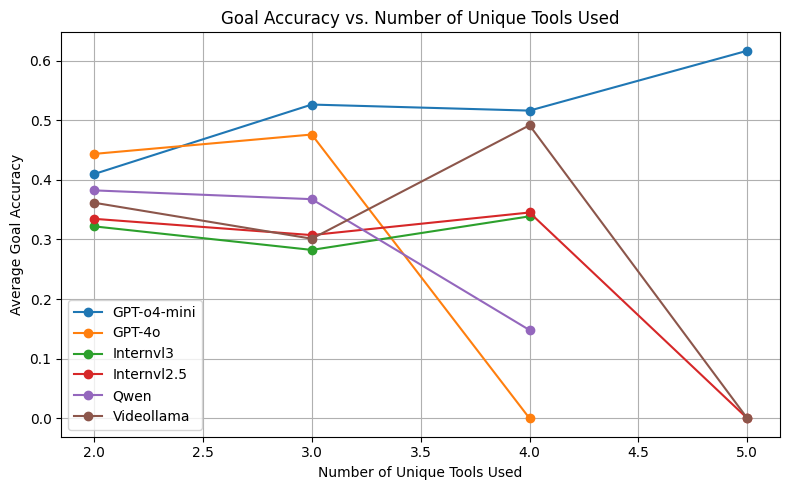

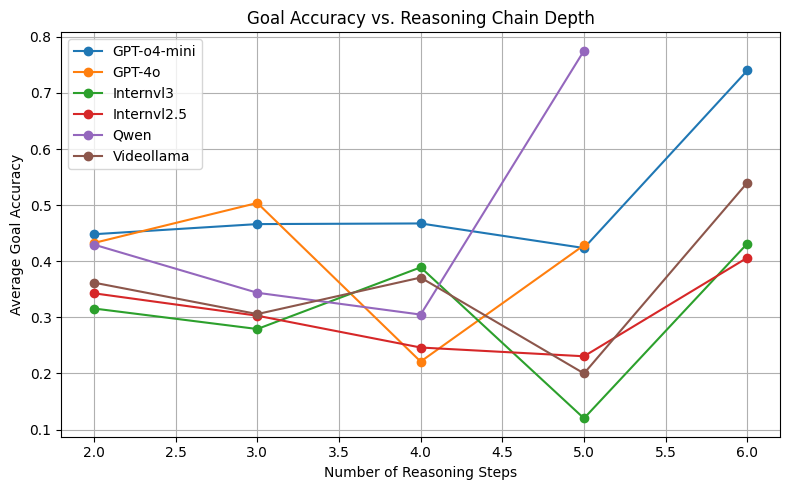

In [67]:
models = [
    ("GPT-o4-mini", "o4_mini_results_final.csv", "o4_g_star.csv"),
    ("GPT-4o", "gpt4o_results_final.csv", "gpt4o_g_star.csv"),
    ("Internvl3", "internvl3_results_final.csv", "internvl3_g_star.csv"),
    ("Internvl2.5", "internvl2_5_results_final.csv", "internvl2_5_g_star.csv"),
    ("Qwen", "qwen2_5_results_final.csv", "qwen2_5_g_star.csv"),
    ("Videollama", "videollama3_results_final 2.csv", "videollama_g_star.csv"),
    #("Gemini-2.5", "gemini25_results_final.csv", "gemini25_g_star.csv"),
    #("Gemini-1.5", "gemini_results_final.csv", "gemini_g_star.csv")
]

compare_models_goal_accuracy_trends(models, min_tools=2, max_tools=5, min_steps=2, max_steps=6)


In [72]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_models_grounding_accuracy_trends(
    model_info_list,
    min_tools=2,
    max_tools=5,
    min_steps=1,
    max_steps=10
):
    """
    Plots Goal Accuracy trends across multiple models on the same graphs.
    
    Parameters:
        model_info_list (list of tuples): Each tuple should be (label, tool_csv_path, metrics_csv_path)
        min_tools (int): Minimum number of unique tools to include
        max_tools (int): Maximum number of unique tools to include
        min_steps (int): Minimum number of reasoning steps to include
        max_steps (int): Maximum number of reasoning steps to include
    """
    
    # === Plot 1: Goal Accuracy vs Unique Tools Used ===
    plt.figure(figsize=(8, 5))
    for label, tool_csv, metrics_csv in model_info_list:
        df_tools = pd.read_csv(tool_csv)
        df_metrics = pd.read_csv(metrics_csv).reset_index().rename(columns={"index": "id"})
        df = pd.merge(df_tools, df_metrics, on="id")
        df = df.dropna(subset=["grounding_accuracy"])

        df_filtered = df[(df["unique_tools_used"] >= min_tools) & (df["unique_tools_used"] <= max_tools)]
        trend = df_filtered.groupby("unique_tools_used")["grounding_accuracy"].mean().reset_index()

        plt.plot(trend["unique_tools_used"], trend["grounding_accuracy"], marker="o", label=label)

    plt.title("Grounding Accuracy vs. Number of Unique Tools Used")
    plt.xlabel("Number of Unique Tools Used")
    plt.ylabel("Average Grounding Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Plot 2: Goal Accuracy vs Reasoning Chain Depth ===
    plt.figure(figsize=(8, 5))
    for label, tool_csv, metrics_csv in model_info_list:
        df_tools = pd.read_csv(tool_csv)
        df_metrics = pd.read_csv(metrics_csv).reset_index().rename(columns={"index": "id"})
        df = pd.merge(df_tools, df_metrics, on="id")
        df = df.dropna(subset=["grounding_accuracy"])

        df_filtered = df[(df["total_steps"] >= min_steps) & (df["total_steps"] <= max_steps)]
        trend = df_filtered.groupby("total_steps")["grounding_accuracy"].mean().reset_index()

        plt.plot(trend["total_steps"], trend["grounding_accuracy"], marker="o", label=label)

    plt.title("Grounding Accuracy vs. Reasoning Chain Depth")
    plt.xlabel("Number of Reasoning Steps")
    plt.ylabel("Average Grounding Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


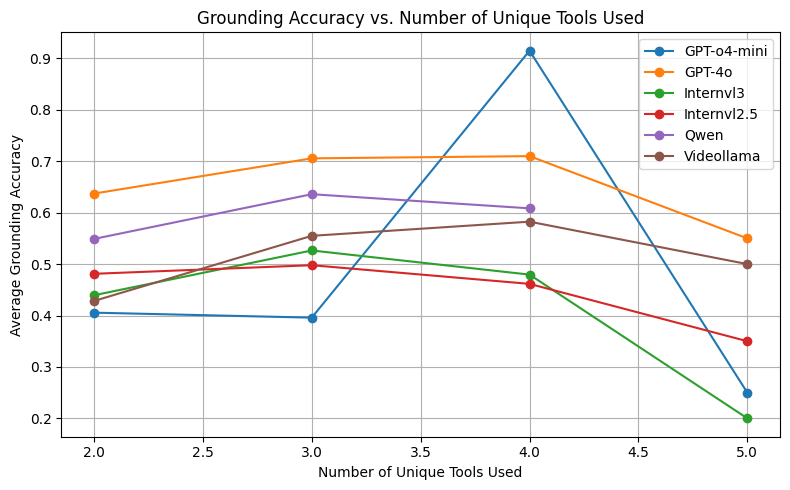

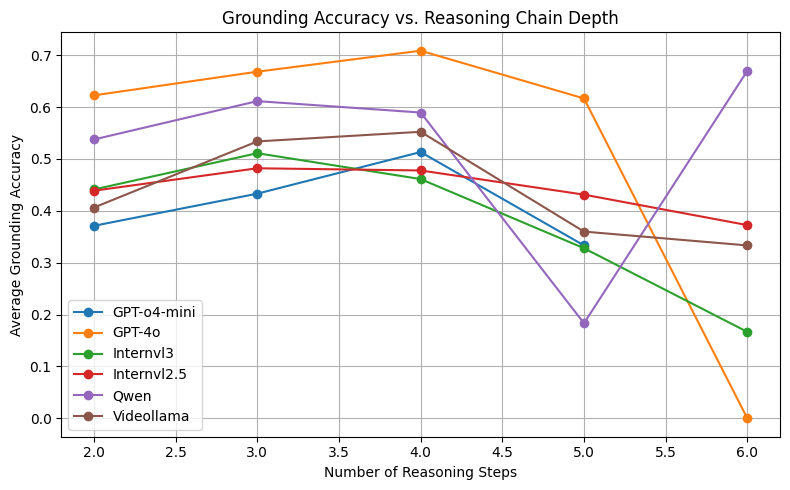

In [73]:
models = [
    ("GPT-o4-mini", "o4_mini_results_final.csv", "o4_g_star.csv"),
    ("GPT-4o", "gpt4o_results_final.csv", "gpt4o_g_star.csv"),
    ("Internvl3", "internvl3_results_final.csv", "internvl3_g_star.csv"),
    ("Internvl2.5", "internvl2_5_results_final.csv", "internvl2_5_g_star.csv"),
    ("Qwen", "qwen2_5_results_final.csv", "qwen2_5_g_star.csv"),
    ("Videollama", "videollama3_results_final 2.csv", "videollama_g_star.csv"),
    #("Gemini-2.5", "gemini25_results_final.csv", "gemini25_g_star.csv"),
    #("Gemini-1.5", "gemini_results_final.csv", "gemini_g_star.csv")
]

compare_models_grounding_accuracy_trends(models, min_tools=2, max_tools=5, min_steps=2, max_steps=6)

In [74]:
import json

# Load the JSON file
with open("verified_data.json", "r") as f:
    data = json.load(f)

# Extract all queries
queries = []
for entry_list in data.values():
    for entry in entry_list:
        if "query" in entry:
            queries.append(entry["query"])

# Print or save the queries
for i, q in enumerate(queries):
    print(f"{i}: {q}")

# Optionally save to a text file
with open("queries.txt", "w") as f:
    for q in queries:
        f.write(q + "\n")

0: Which color line grows most rapidly and first overtakes all others in value, and what is its approximate average height across the chart?
1: How many woman in the video and put a box on the banana in the video.
2: Recognise the different types of objects on the table. Which object do you think is more expensive and what is its price range in current market?
3: Given the scene identify where the video is of and how many people are performing duties?
4: Which segment in the pie chart represents the largest share, and how does its size compare to the second-largest segment? Estimate their proportions as percentages.
5: How many distint vehicles can be seen in the video, what are they? And how many of them are already in parking condition?
6: What is the total volume of the shapes shown in the image, assuming all objects are solid and uniformly sized as follows: Cylinders have a height of 2 units and a radius of 1 unit, And Cubes have a side length of 2 units.
7: What is the color of th

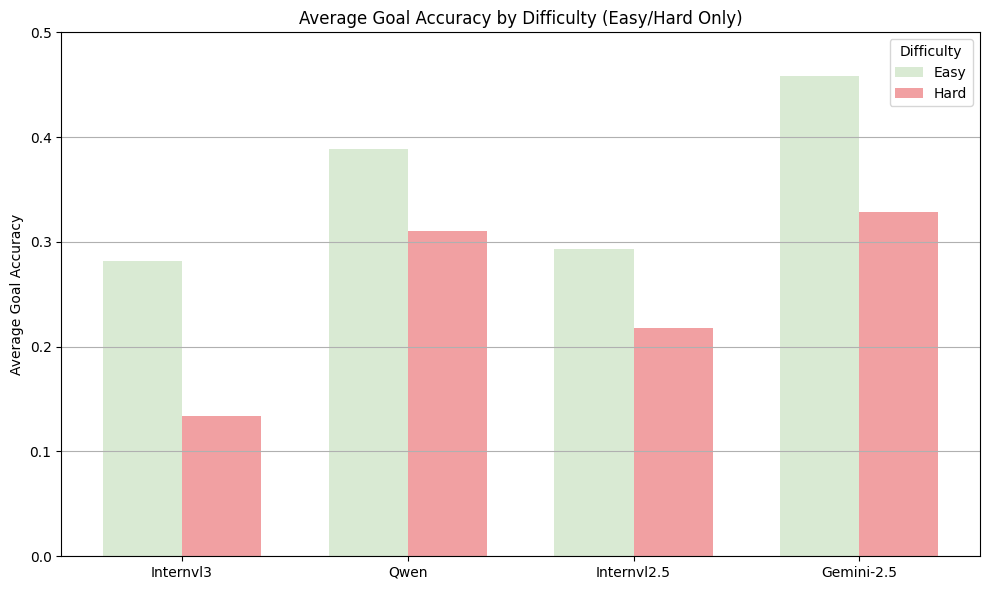

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Model list
models = [
    ("Internvl3", "internvl3_g_star.csv"),
    ("Qwen", "qwen2_5_g_star.csv"),
    ("Internvl2.5", "internvl2_5_g_star.csv"),
    
    ("Gemini-2.5", "gemini25_g_star.csv"),
]

# Load categorized queries
df_cat = pd.read_csv("categorized_queries.csv").reset_index().rename(columns={"index": "id"})

# Collect performance data
plot_data = []
for model_name, csv_file in models:
    df_acc = pd.read_csv(csv_file).reset_index().rename(columns={"index": "id"})
    df = pd.merge(df_cat, df_acc, on="id")
    goal_col = "goal_accuracy" if "goal_accuracy" in df.columns else "goal_accuray"
    df = df.dropna(subset=[goal_col])
    grouped = df.groupby("difficulty")[goal_col].mean()
    plot_data.append({
        "model": model_name,
        "easy": grouped.get("easy", 0),
        "hard": grouped.get("hard", 0)
    })

# Prepare DataFrame for plotting
df_plot = pd.DataFrame(plot_data)

# Plotting setup
difficulties = ["easy", "hard"]
colors = {"easy": "#d9ead3", "hard": "#f1a0a2"}
x = range(len(models))
bar_width = 0.35

plt.figure(figsize=(10, 6))

for i, diff in enumerate(difficulties):
    plt.bar(
        [p + i * bar_width for p in x],
        df_plot[diff],
        width=bar_width,
        label=diff.capitalize(),
        color=colors[diff]
    )

# Center xticks under grouped bars
plt.xticks([p + bar_width / 2 for p in x], df_plot["model"], rotation=0)

plt.title("Average Goal Accuracy by Difficulty (Easy/Hard Only)")
plt.ylabel("Average Goal Accuracy")
plt.ylim(0, 0.5)
plt.legend(title="Difficulty")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## Human Evaluation

In [27]:
GENERATIVE_IDS_HUMAN = [2, 8, 13, 22, 24, 28, 31, 39]

In [35]:
import pandas as pd
def goal_score_g(FILE_IN, FILE_OUT):
    # === ✅ Load CSV ===
    df = pd.read_csv(FILE_IN, sep=';')


    # === ✅ Clear goal_accuray for generative rows ===
    for idx in GENERATIVE_IDS_HUMAN:
        if 0 <= idx < len(df):
            df.at[idx, "goal score (for objective + subjective)"] = ""

    # === ✅ Save updated version ===
    df.to_csv(FILE_OUT, index=False)
    print(f"✅ Cleared 'goal score (for objective + subjective)' for {len(GENERATIVE_IDS_HUMAN)} rows → saved to: {FILE_OUT}")

    # === ✅ Re-load updated file for metric computation ===
    df_updated = pd.read_csv(FILE_OUT)

    # === ✅ Compute global average of goal score (for objective + subjective) ===
    df_updated['goal score (for objective + subjective)'] = pd.to_numeric(df_updated['goal score (for objective + subjective)'], errors='coerce')
    global_avg = df_updated['goal score (for objective + subjective)'].dropna().mean()
    print(f"\n📊 Global average goal score (for objective + subjective) (excluding cleared): {global_avg:.3f}")

    # === ✅ Compute generative subset means (tool metrics only) ===
    columns = ['tool Precision', 'Tool Accuracy', 'toolset accuracy']
    for col in columns:
        df_updated[col] = pd.to_numeric(df_updated[col], errors='coerce')

    # subset_means = {col: df_updated.loc[GENERATIVE_IDS, col].dropna().mean() for col in columns}
    valid_ids = [i for i in GENERATIVE_IDS if i in df_updated.index]
    subset_means = {col: df_updated.loc[valid_ids, col].dropna().mean() for col in columns}

    print("\n📊 Means over generative rows:")
    for col, val in subset_means.items():
        print(f"• {col}: {val:.3f}")

    overall_tool_avg = sum(subset_means.values()) / len(subset_means)
    print(f"\n✅ Average of tool metrics for generative rows: {overall_tool_avg:.3f}")

In [39]:
goal_score_g("./human_eval/gemini25_human_eval.csv", "./human_eval/gemini25_human_eval_g_star.csv")
goal_score_g("./human_eval/gpt4o_human_eval.csv", "./human_eval/gpt4o_human_eval_g_star.csv")
goal_score_g("./human_eval/internvl_human_eval.csv", "./human_eval/internvl_human_eval_g_star.csv")
goal_score_g("./human_eval/qwen2_5_human_eval.csv", "./human_eval/qwen2_5_g_star.csv")
goal_score_g("./human_eval/videollama_human_eval.csv", "./human_eval/videollama_human_eval_g_star.csv")

✅ Cleared 'goal score (for objective + subjective)' for 8 rows → saved to: ./human_eval/gemini25_human_eval_g_star.csv

📊 Global average goal score (for objective + subjective) (excluding cleared): 0.746

📊 Means over generative rows:
• tool Precision: 0.625
• Tool Accuracy: 0.819
• toolset accuracy: 0.801

✅ Average of tool metrics for generative rows: 0.748
✅ Cleared 'goal score (for objective + subjective)' for 8 rows → saved to: ./human_eval/gpt4o_human_eval_g_star.csv

📊 Global average goal score (for objective + subjective) (excluding cleared): 0.551

📊 Means over generative rows:
• tool Precision: 0.333
• Tool Accuracy: 0.650
• toolset accuracy: 0.438

✅ Average of tool metrics for generative rows: 0.474
✅ Cleared 'goal score (for objective + subjective)' for 8 rows → saved to: ./human_eval/internvl_human_eval_g_star.csv

📊 Global average goal score (for objective + subjective) (excluding cleared): 0.582

📊 Means over generative rows:
• tool Precision: 0.833
• Tool Accuracy: 0.8